In [2]:
""""Moving Average Crossover Trading Strategy"""
#Look at the Adjusted Close values for the German Index and determine buying and selling signs
#For this we look at the Moving averages for 20 and 50 days and check once one crosses the other

#buying signal -  moment MA20 becomes > MA50 
#selling signal -  moment MA20 becomes < MA50

'"Moving Average Crossover Trading Strategy'

In [57]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = yf.download('^GDAXI', start='2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,10477.769531,10612.719727,10386.969727,10580.190430,10580.190430,79626700
2019-01-03,10467.110352,10538.660156,10400.110352,10416.660156,10416.660156,84733800
2019-01-04,10533.940430,10786.339844,10483.900391,10767.690430,10767.690430,95339500
2019-01-07,10814.389648,10814.469727,10681.269531,10747.809570,10747.809570,71151400
2019-01-08,10750.190430,10910.709961,10745.030273,10803.980469,10803.980469,93672200
...,...,...,...,...,...,...
2022-12-05,14487.429688,14507.160156,14394.370117,14447.610352,14447.610352,50074900
2022-12-06,14406.870117,14471.500000,14305.259766,14343.190430,14343.190430,50930900
2022-12-07,14304.950195,14372.349609,14218.179688,14261.190430,14261.190430,52784800


In [6]:
df['MA20'] = df['Adj Close'].rolling(20).mean()
df['MA50'] = df['Adj Close'].rolling(50).mean()

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2019-01-02,10477.769531,10612.719727,10386.969727,10580.190430,10580.190430,79626700,NaN,NaN
2019-01-03,10467.110352,10538.660156,10400.110352,10416.660156,10416.660156,84733800,NaN,NaN
2019-01-04,10533.940430,10786.339844,10483.900391,10767.690430,10767.690430,95339500,NaN,NaN
2019-01-07,10814.389648,10814.469727,10681.269531,10747.809570,10747.809570,71151400,NaN,NaN
2019-01-08,10750.190430,10910.709961,10745.030273,10803.980469,10803.980469,93672200,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-05,14487.429688,14507.160156,14394.370117,14447.610352,14447.610352,50074900,14313.202979,13350.772246
2022-12-06,14406.870117,14471.500000,14305.259766,14343.190430,14343.190430,50930900,14345.925000,13394.842461
2022-12-07,14304.950195,14372.349609,14218.179688,14261.190430,14261.190430,52784800,14375.668506,13436.400664


In [9]:
df = df.dropna()

In [10]:
df = df[['Adj Close','MA20','MA50']]

In [11]:
df

,Adj Close,MA20,MA50
Date,,,
2019-03-12,11524.169922,11447.165967,11187.565020
2019-03-13,11572.410156,11467.425488,11207.409414
2019-03-14,11587.469727,11492.309473,11230.825605
2019-03-15,11685.690430,11511.604004,11249.185605
2019-03-18,11657.059570,11529.496973,11267.370605
...,...,...,...
2022-12-02,14529.389648,14267.498438,13306.378437
2022-12-05,14447.610352,14313.202979,13350.772246
2022-12-06,14343.190430,14345.925000,13394.842461


In [13]:
#buying signal -  moment MA20 becomes > MA50 
#selling signal -  moment MA20 becomes < MA50

Buy = [] 
Sell = []

for i in range(len(df)):
    if df.MA20.iloc[i] > df.MA50.iloc[i] and df.MA20.iloc[i-1] < df.MA50.iloc[i-1]:
        Buy.append(i)
    elif df.MA20.iloc[i] < df.MA50.iloc[i] and df.MA20.iloc[i-1] > df.MA50.iloc[i-1]:
        Sell.append(i)

In [14]:
Buy

[75, 132, 288, 432, 613, 671, 719, 789, 820, 867, 926]

In [15]:
Sell

[59, 102, 243, 398, 601, 640, 699, 735, 796, 830, 888]

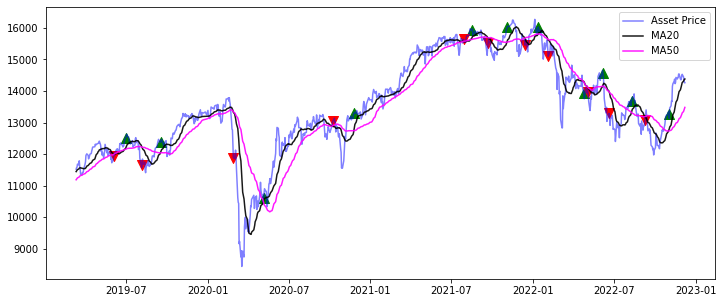

In [18]:
plt.figure(figsize=(12,5))
plt.plot(df['Adj Close'], label = 'Asset Price', c = 'blue', alpha = 0.5)
plt.plot(df['MA20'], label = 'MA20', c='k', alpha=0.9)
plt.plot(df['MA50'], label = 'MA50', c='magenta', alpha=0.9)

plt.scatter(df.iloc[Buy].index,df.iloc[Buy]['Adj Close'], marker = '^', color = 'green', s = 100)
plt.scatter(df.iloc[Sell].index,df.iloc[Sell]['Adj Close'], marker = 'v', color = 'red', s = 100)
plt.legend()
plt.show()

In [11]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
MA20         float64
MA50         float64
dtype: object

In [13]:
import time
import datetime

In [22]:
s1 = "2022-07-01 11:13:00.745296955"[:-3]
s2 = "2022-07-01 11:13:00.745896955"[:-3]
format = "%Y-%m-%d %H:%M:%S.%f"
seconds = time.mktime(datetime.datetime.strptime(s1, format).timetuple())
seconds1 = time.mktime(datetime.datetime.strptime(s2, format).timetuple())
print(seconds>seconds1)

False


In [31]:
def string_2_ts(ts_string):
    """ Converts the time stamp string into the real time stamp"""

    ts_str = ts_string[11:-3]
    format = "%Y-%m-%d %H:%M:%S.%f"
    
    return time.mktime(datetime.datetime.strptime(ts_str, format).timetuple())

In [47]:
def input_to_ts_stock_price(input_string):
    """ Extracts from the initial input the ts, the stock and the price"""
    
    #subdivide the string
    ts_str = input_string[:40]
    stock_str = input_string[40:60]
    price_str = input_string[60:]

    #obtain the inputs
    ts = time.mktime(datetime.datetime.strptime(ts_str[11:-3],"%Y-%m-%d %H:%M:%S.%f").timetuple()) 
    stock_name = stock_str[-2]
    price = float(price_str[1:])
    
    return ts, stock_name, price


In [50]:
print(string_2_ts("Timestamp: 2022-07-01 11:13:00.745296955"))
print(string_2_ts("Timestamp: 2022-07-01 11:13:00.785296955"))

1656670380.0
1656670380.0


In [35]:
A = [[1,2,3],[4,5,6]]
len(", price for stock A")

19

In [52]:
print(input_to_ts_stock_price("Timestamp: 2022-07-01 11:13:00.745296955, price for stock A: 46.70381475969364"))
print(input_to_ts_stock_price("Timestamp: 2022-07-01 11:13:00.785296955, price for stock A: 46.74381475969364"))

Timestamp: 2022-07-01 11:13:00.745296955
, price for stock A:
46.70381475969364
(1656670380.0, 'A', 46.70381475969364)
Timestamp: 2022-07-01 11:13:00.785296955
, price for stock A:
46.74381475969364
(1656670380.0, 'A', 46.74381475969364)


In [53]:
A

[[1, 2, 3], [4, 5, 6]]

In [58]:
B = np.copy(A)

In [59]:
B

array([[1, 2, 3],
       [4, 5, 6]])

In [60]:
A[0][0]=0

In [62]:
B

array([[1, 2, 3],
       [4, 5, 6]])

In [63]:
c = 1

In [64]:
d = c

In [65]:
c=2

In [66]:
d

1

In [ ]:
def get_profit(m, c, data):
    transactions = []
    idx = 0
    foundA = False
    foundB = False
    
    #check when does the first A appears
    while not foundA:
        #load the information
        last_ts_A, stock_name, last_price_A = input_to_ts_stock_price(data[idx])
        
        if stock_name == A:
            foundA = True
        idx+=1


    last_price_B = None    
    """
    #check when does the first B appears
    while not foundB:
        #load the information
        last_ts_B, stock_name, last_price_B = input_to_ts_stock_price(data[idx])
        
        if stock_name == B:
            foundB = True
        idx+=1
    """
    
    
    #do the algorithm
    while idx < len(data):
        
        #go until the next A
        ts, stock_name, price = input_to_ts_stock_price(data[idx])
        
        #save the data from the last B
        if stock_name == B:
            last_ts_B = ts
            last_price_B = price
        
        else: #stock name is A
            if abs(price - last_price_A) <= c or last_price_B is None:
                idx += 1
            else:
                #check for the next B
                found = False
                idxx = 0
                idxx = idx
                while not found and idxx <= len(data):
                    ts, stock_name, price = input_to_ts_stock_price(data[idxx])
                    if stock_name ==B:
                        if price > last_price_A:
                            transactions.append(price-last_price_B)
                        else:
                            transactions.append(last_price_B-price)
                        found = True
                    idxx+=1
                #if idxx >len(data):
            last_price_A = price
            last_ts_A = ts
        idx+=1
    return sum(transactions)
                            
                        